In [1]:
# check pangenome blastn to pangenome
# looking for threshold of betweeen first and second best hits

In [35]:
import pandas as pd
import os
import re
from Bio.Seq import Seq
from Bio import SeqIO
import seaborn as sns
import matplotlib.pyplot as plt 

In [20]:
filename = "../data/blastn/pangenome_allORFs-pangenome.tsv"
blastn_cols = ['query','target','percent_id','alignment_length','mismatch','gapopen','qstart','qend','tstart','tend','evalue','bitscore']

df = pd.read_csv(filename, names=blastn_cols, sep="\t")

In [21]:
# map length of target (ref) sequences
input_file = '../data/1011_pangenome/allORFs_pangenome.fasta'
handle = []
seq = []

for record in SeqIO.parse(input_file, "fasta"):
    handle.append(record.id)
    seq.append(str(record.seq))
    
ref_df = pd.DataFrame({'ref_id':handle,'ref_seq':seq})

ref_df['ref_len'] = ref_df.ref_seq.str.len()

ref_map = dict(zip(ref_df.ref_id, ref_df.ref_len))

df['tseq_len'] = df.target.map(ref_map)

# percent id whole
df['percent_id_whole'] = (((df.alignment_length) / df.tseq_len) * df.percent_id/100)

In [23]:
# get queries with multiple hits
vc = df["query"].value_counts()
multi_hits = vc[vc > 1].index.tolist()

df = df.query('query.isin(@multi_hits)')

In [27]:
df.head()

,query,target,percent_id,alignment_length,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bitscore,tseq_len,percent_id_whole
10,11-EC1118_1F14_0144g,11-EC1118_1F14_0144g,100.000,1488,0,0,1,1488,1,1488,0.000000e+00,2748.0,1488,1.000000
11,11-EC1118_1F14_0144g,116-augustus_masked-1659-AIE_1,78.571,1498,304,15,1,1488,1,1491,0.000000e+00,972.0,1491,0.789399
24,24-EC1118_1O4_6557g,24-EC1118_1O4_6557g,100.000,1563,0,0,1,1563,1,1563,0.000000e+00,2887.0,1563,1.000000
25,24-EC1118_1O4_6557g,734-augustus_masked-AIE_1-5050,73.443,305,65,16,1216,1513,490,785,6.890000e-21,100.0,1005,0.222887
26,24-EC1118_1O4_6557g,359-augustus_masked-8489-AQD_4,69.983,603,168,13,959,1555,959,1554,2.480000e-20,99.0,1725,0.244636


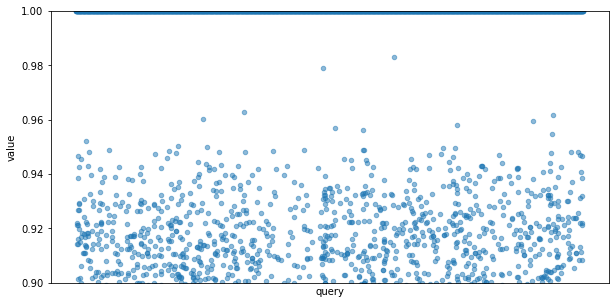

In [38]:
ax = df.melt('query','percent_id_whole').plot.scatter(x='query', y='value', figsize=(10, 5), alpha=.5)
ax.set_ylim(.9,1)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

In [39]:
df.shape

(14788, 14)

In [41]:
len(ref_map)

7796

In [42]:
df['query'].nunique()

2929

In [ ]:
2929/7796